In [ ]:
import pandas as pd
import numpy as np
df2=pd.read_csv(r"movies.csv")
df1=pd.read_csv(r"credits.csv")

In [ ]:
df1.columns = ['id','tittle','cast','crew']
big_table= df2.merge(df1,on='id')
big_table.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [ ]:
columns_to_remove = ["homepage","keywords","original_language", "tagline", "title","overview", "production_countries", "production_companies","release_date","revenue","runtime","spoken_languages","tagline","title"]

movies = big_table.drop(columns=columns_to_remove, axis=1)
movies

,budget,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,107.376788,Released,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,112.312950,Released,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,43.926995,Released,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,El Mariachi,14.269792,Released,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,Newlyweds,0.642552,Released,5.9,5,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"Signed, Sealed, Delivered",1.444476,Released,7.0,6,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,0,[],126186,Shanghai Calling,0.857008,Released,5.7,7,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [ ]:
vote_average_threshold = movies['vote_average'].mean()
vote_count_threshold = movies['vote_count'].mean()
popularity_threshold = movies['popularity'].mean()

# Create the "is_popular" column based on the criteria
movies['liked'] = (
    (movies['vote_average'] >= vote_average_threshold) &
    (movies['vote_count'] >= vote_count_threshold) &
    (movies['popularity'] >= popularity_threshold)
).astype(int)

In [ ]:
import ast

def convert_genres(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l

In [ ]:
movies['genres'] = movies['genres'].apply(convert_genres)

In [ ]:
movies.head(2)

,budget,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,liked
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [ ]:
def convert_cast(text):
    l = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            l.append(i['name'])
        counter += 1
    return l

In [ ]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head(2)

,budget,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,liked
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [ ]:
def fetch_director(text):
    l = []
    for i in ast.literal_eval(text):
        if i['job'] == "Director":
            l.append(i['name'])
            break
    return l

In [ ]:
movies['Director'] = movies['crew'].apply(fetch_director)
movies.drop(['crew','status'],axis="columns",inplace=True)
movies.head(2)

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",1,[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",1,[Gore Verbinski]


In [ ]:
movies['Director'] = movies['Director'].apply(lambda x: ''.join(x))
movies['genres'] = movies['genres'].apply(lambda x: ''.join(x))
movies['cast'] = movies['cast'].apply(lambda x: ''.join(x))
movies

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,ActionAdventureFantasyScience Fiction,19995,Avatar,150.437577,7.2,11800,Avatar,Sam WorthingtonZoe SaldanaSigourney Weaver,1,James Cameron
1,300000000,AdventureFantasyAction,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,Johnny DeppOrlando BloomKeira Knightley,1,Gore Verbinski
2,245000000,ActionAdventureCrime,206647,Spectre,107.376788,6.3,4466,Spectre,Daniel CraigChristoph WaltzLéa Seydoux,1,Sam Mendes
3,250000000,ActionCrimeDramaThriller,49026,The Dark Knight Rises,112.312950,7.6,9106,The Dark Knight Rises,Christian BaleMichael CaineGary Oldman,1,Christopher Nolan
4,260000000,ActionAdventureScience Fiction,49529,John Carter,43.926995,6.1,2124,John Carter,Taylor KitschLynn CollinsSamantha Morton,1,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,ActionCrimeThriller,9367,El Mariachi,14.269792,6.6,238,El Mariachi,Carlos GallardoJaime de HoyosPeter Marquardt,0,Robert Rodriguez
4799,9000,ComedyRomance,72766,Newlyweds,0.642552,5.9,5,Newlyweds,Edward BurnsKerry BishéMarsha Dietlein,0,Edward Burns
4800,0,ComedyDramaRomanceTV Movie,231617,"Signed, Sealed, Delivered",1.444476,7.0,6,"Signed, Sealed, Delivered",Eric MabiusKristin BoothCrystal Lowe,0,Scott Smith
4801,0,,126186,Shanghai Calling,0.857008,5.7,7,Shanghai Calling,Daniel HenneyEliza CoupeBill Paxton,0,Daniel Hsia


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_genres = LabelEncoder()
le_original_title = LabelEncoder()
le_tittle  = LabelEncoder()
le_cast  = LabelEncoder()
le_Director  = LabelEncoder()


In [ ]:
movies['genres']=le_genres.fit_transform(movies['genres'])

movies['original_title']=le_original_title.fit_transform(movies['original_title'])


movies['tittle']=le_tittle.fit_transform(movies['tittle'])
movies['cast']=le_cast.fit_transform(movies['cast'])
movies['Director']=le_Director.fit_transform(movies['Director'])

movies

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,64,19995,372,150.437577,7.2,11800,379,3932,1,886
1,300000000,332,285,2665,139.082615,6.9,4500,2648,2269,1,770
2,245000000,33,206647,3188,107.376788,6.3,4466,3181,960,1,1972
3,250000000,135,49026,3594,112.312950,7.6,9106,3612,794,1,361
4,260000000,76,49529,1891,43.926995,6.1,2124,1901,4287,1,94
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,141,9367,1138,14.269792,6.6,238,1145,640,0,1896
4799,9000,527,72766,2463,0.642552,5.9,5,2442,1232,0,606
4800,0,482,231617,3081,1.444476,7.0,6,3072,1330,0,1998
4801,0,0,126186,3034,0.857008,5.7,7,3021,972,0,440


In [ ]:
x=movies.drop('liked',axis='columns')
y=movies['liked']

In [ ]:

x.dtypes
x.isnull().any()

budget            False
genres            False
id                False
original_title    False
popularity        False
vote_average      False
vote_count        False
tittle            False
cast              False
Director          False
dtype: bool

In [ ]:
y.isnull().any()

False

In [ ]:
movies.shape


(4803, 11)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC  # Importing the SVM classifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
svm = SVC()  # Using SVM instead of Logistic Regression
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_scores = svm.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8022206800832755
Precision: 0.6111111111111112
Recall: 0.18032786885245902
F1 Score: 0.2784810126582279
ROC AUC Score: 0.5792830755021936


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=31)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
svm = SVC()  # Using SVM instead of Logistic Regression
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_scores = svm.decision_function(X_test_pca)
roc_auc = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8376127689104789
Precision: 0.5915492957746479
Recall: 0.1700404858299595
F1 Score: 0.2641509433962264
ROC AUC Score: 0.6586712238656169


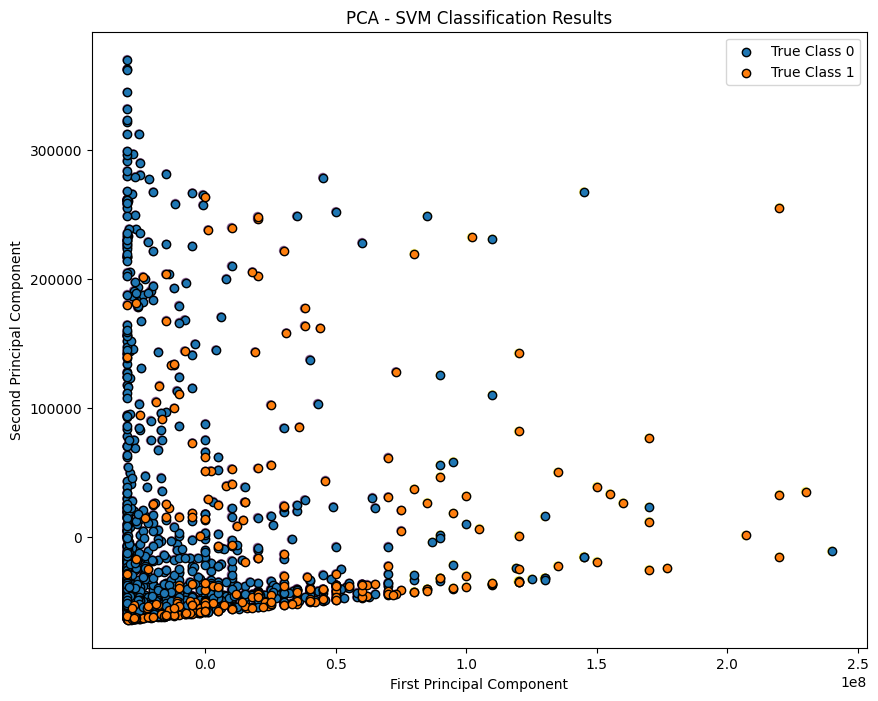

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))

# Plotting data points with predicted labels
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.5)

# Adding legend for predicted classes
plt.legend(handles=scatter.legend_elements()[0], title="Predicted Classes")

# Plotting true labels for comparison (optional)
for i, true_label in enumerate(np.unique(y_test)):
    indices = np.where(y_test == true_label)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], label=f"True Class {true_label}", edgecolor='k')

plt.legend()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - SVM Classification Results')
plt.show()


In [ ]:
X_train_pca.shape

(3362, 2)

In [ ]:
X=X_train_pca[:400,:2]
X.shape

(400, 2)

In [ ]:
y=y[:400]
y

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    0
398    1
399    0
Name: liked, Length: 400, dtype: int32

In [ ]:

svc = SVC(kernel='linear', C=1).fit(X, y)

# Create a mesh to plot the decision boundaries
# Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundary and margins
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('f1')
plt.ylabel('f2')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()